# 1. Library Import

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline

import matplotlib as mpl  # 기본 설정
import matplotlib.pyplot as plt  # 그래프 그리기
import matplotlib.font_manager as fm  # 폰트 관리


!apt-get update -qq         # apt-get 패키지 설치 명령어, -qq : 에러외 메세지 숨기기
!apt-get install fonts-nanum* -qq #나눔글꼴 설치

fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', name='NanumGothic') #파일 저장되어있는 경로와 이름 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) #폰트설정



W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


# 2. 데이터 불러오기 및 확인

In [3]:
df_hitter = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HK/kbo_salary/KBO_Salary/hitter_salary_debut.csv')

In [4]:
df_hitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535 entries, 0 to 534
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   순위      535 non-null    int64  
 1   선수명     535 non-null    object 
 2   팀명      535 non-null    object 
 3   AVG     535 non-null    float64
 4   G       535 non-null    int64  
 5   PA      535 non-null    int64  
 6   AB      535 non-null    int64  
 7   R       535 non-null    int64  
 8   H       535 non-null    int64  
 9   2B      535 non-null    int64  
 10  3B      535 non-null    int64  
 11  HR      535 non-null    int64  
 12  TB      535 non-null    int64  
 13  RBI     535 non-null    int64  
 14  SAC     535 non-null    int64  
 15  SF      535 non-null    int64  
 16  BB      535 non-null    int64  
 17  IBB     535 non-null    int64  
 18  HBP     535 non-null    int64  
 19  SO      535 non-null    int64  
 20  GDP     535 non-null    int64  
 21  SLG     535 non-null    float64
 22  OB

In [5]:
df_hitter.shape

(535, 32)

In [6]:
df_hitter.head()

,순위,선수명,팀명,AVG,G,PA,AB,R,H,2B,...,OBP,OPS,MH,RISP,PH-BA,연도,연봉(만원),WAR,후년연봉,연차
0,8,강민호,삼성,0.287,119,393,355,46,102,14,...,0.349,0.836,26,0.303,0.143,2020,125000,3.11,50000,17
1,4,강민호,삼성,0.291,123,462,406,55,118,22,...,0.361,0.839,34,0.250,0.250,2021,50000,3.91,60000,18
2,13,강민호,삼성,0.258,130,444,396,38,102,19,...,0.330,0.739,19,0.287,0.400,2022,60000,0.51,60000,19
3,4,강민호,삼성,0.290,125,495,434,60,126,19,...,0.366,0.811,32,0.301,0.000,2023,60000,2.61,40000,20
4,2,강백호,KT,0.330,129,574,500,95,165,36,...,0.411,0.955,48,0.320,0.500,2020,21000,5.81,31000,3


## 2.2. 컬럼 추가

OPS+: (출루율/리그평균출루율 + 장타율/리그평균장타율 -1)*100/파크팩터  
$( PF(Park Factor) = 100 * ( \frac{\frac{homeRS+homeRA}{homeG}}{ \frac{roadRS+roadRA}{roadG}} ) )$

In [7]:
df_pf = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HK/kbo_salary/KBO_Salary/pitcher_meanERA_parkfactor.csv')

df_pf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 41 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   순위              444 non-null    int64  
 1   선수명             444 non-null    object 
 2   팀명              444 non-null    object 
 3   ERA             444 non-null    float64
 4   G               444 non-null    int64  
 5   W               444 non-null    int64  
 6   L               444 non-null    int64  
 7   SV              444 non-null    int64  
 8   HLD             444 non-null    int64  
 9   WPCT            444 non-null    float64
 10  IP              444 non-null    float64
 11  H               444 non-null    float64
 12  HR              444 non-null    int64  
 13  BB              444 non-null    int64  
 14  HBP             444 non-null    int64  
 15  SO              444 non-null    int64  
 16  R               444 non-null    int64  
 17  ER              444 non-null    int

In [8]:
df_pf = df_pf[['연도','팀명','park_factor']].drop_duplicates().reset_index()

In [9]:
league = {
    '리그평균출루율' : [0.349,0.346,0.333,0.338],
    '리그평균장타율' : [0.409,0.383,0.379,0.374],
    '연도' : [2020, 2021, 2022, 2023]
}

df_league = pd.DataFrame(league)

In [10]:
df_league.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   리그평균출루율  4 non-null      float64
 1   리그평균장타율  4 non-null      float64
 2   연도       4 non-null      int64  
dtypes: float64(2), int64(1)
memory usage: 224.0 bytes


In [11]:
def calculate_ops_plus(df_hitter):
    slg = df_hitter['SLG'] / (df_league.loc[df_league['연도'] == df_hitter['연도'],'리그평균장타율'].values[0])

    obp = df_hitter['OBP'] / (df_league.loc[df_league['연도'] == df_hitter['연도'],'리그평균출루율'].values[0])
    pf = df_pf.loc[(df_pf['연도']==df_hitter['연도']) & (df_pf['팀명'] == df_hitter['팀명']),'park_factor'].values[0]

    ops_plus = (slg + obp - 1) * 100 / pf
    return ops_plus

df_hitter['OPS+'] = df_hitter.apply(calculate_ops_plus, axis=1)

In [12]:
df_eda = df_hitter.drop(['선수명','팀명','순위','연도'],axis=1)
df_eda.corr()

,AVG,G,PA,AB,R,H,2B,3B,HR,TB,...,OBP,OPS,MH,RISP,PH-BA,연봉(만원),WAR,후년연봉,연차,OPS+
AVG,1.000000,0.491600,0.527919,0.531489,0.539856,0.584998,0.534176,0.321527,0.342677,0.561367,...,0.846183,0.895292,0.581834,0.553593,0.226074,0.267892,0.525961,0.304485,0.267491,0.892259
G,0.491600,1.000000,0.924195,0.922525,0.859538,0.883963,0.805955,0.445022,0.575202,0.861784,...,0.520230,0.536301,0.828226,0.396298,0.215755,0.422377,0.682182,0.490235,0.462417,0.533907
PA,0.527919,0.924195,1.000000,0.998334,0.941981,0.980582,0.904257,0.498352,0.661344,0.963712,...,0.545380,0.584424,0.948214,0.424989,0.217472,0.513550,0.787018,0.580741,0.457188,0.582314
AB,0.531489,0.922525,0.998334,1.000000,0.938893,0.983423,0.906140,0.506084,0.656593,0.964887,...,0.532736,0.579445,0.951332,0.426099,0.215663,0.506033,0.775762,0.572433,0.451116,0.576720
R,0.539856,0.859538,0.941981,0.938893,1.000000,0.951464,0.882933,0.570530,0.671097,0.947356,...,0.557211,0.605366,0.937351,0.417215,0.236487,0.505537,0.839367,0.579187,0.381505,0.597538
H,0.584998,0.883963,0.980582,0.983423,0.951464,1.000000,0.926771,0.522293,0.652577,0.978104,...,0.568348,0.618035,0.984115,0.450605,0.230970,0.515390,0.827826,0.579776,0.430630,0.612554
2B,0.534176,0.805955,0.904257,0.906140,0.882933,0.926771,1.000000,0.392009,0.668940,0.937637,...,0.527192,0.610009,0.920869,0.420500,0.215324,0.517121,0.785100,0.558320,0.429303,0.600931
3B,0.321527,0.445022,0.498352,0.506084,0.570530,0.522293,0.392009,1.000000,0.121756,0.471140,...,0.278236,0.286362,0.509867,0.220893,0.139580,0.123584,0.495458,0.241643,0.027767,0.296486
HR,0.342677,0.575202,0.661344,0.656593,0.671097,0.652577,0.668940,0.121756,1.000000,0.791241,...,0.377284,0.564849,0.641632,0.283751,0.211814,0.548539,0.639106,0.612406,0.408235,0.543073
TB,0.561367,0.861784,0.963712,0.964887,0.947356,0.978104,0.937637,0.471140,0.791241,1.000000,...,0.556893,0.651024,0.963352,0.437728,0.243269,0.559900,0.841167,0.629972,0.450836,0.640821


In [13]:
df_eda.describe()

,AVG,G,PA,AB,R,H,2B,3B,HR,TB,...,OBP,OPS,MH,RISP,PH-BA,연봉(만원),WAR,후년연봉,연차,OPS+
count,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,...,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000
mean,0.242138,84.489720,275.267290,240.028037,34.022430,64.385047,11.022430,1.022430,5.332710,93.450467,...,0.318148,0.663002,16.115888,0.242198,0.214473,25025.663551,1.406336,25481.738318,8.545794,0.083080
std,0.068091,43.120068,199.317472,173.470656,27.689684,51.973392,9.892278,1.653354,7.004918,78.296427,...,0.071765,0.172363,14.922824,0.108728,0.238355,42212.847498,1.920611,37783.821164,5.321258,0.046593
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2700.000000,-2.480000,3000.000000,1.000000,-0.103199
25%,0.215500,47.000000,85.500000,74.000000,10.000000,17.000000,2.000000,0.000000,0.000000,22.000000,...,0.289000,0.590500,3.000000,0.200000,0.000000,3400.000000,-0.040000,4500.000000,4.000000,0.064144
50%,0.251000,92.000000,258.000000,224.000000,28.000000,54.000000,9.000000,0.000000,3.000000,79.000000,...,0.327000,0.684000,12.000000,0.260000,0.182000,7200.000000,0.610000,9000.000000,8.000000,0.088491
75%,0.284000,123.000000,463.500000,406.000000,53.000000,110.500000,18.000000,1.000000,7.000000,153.500000,...,0.362000,0.765500,27.000000,0.305500,0.333000,26000.000000,2.570000,30000.000000,12.000000,0.110818
max,0.750000,144.000000,651.000000,570.000000,115.000000,192.000000,46.000000,11.000000,35.000000,313.000000,...,0.750000,1.750000,59.000000,1.000000,1.000000,270000.000000,7.910000,270000.000000,24.000000,0.376648


# 4. 클러스터링

## 4.1 데이터

In [14]:
from sklearn.preprocessing import StandardScaler

scaled_data = df_eda.drop(['연봉(만원)','후년연봉','연차','OPS+'],axis=1)

scaler = StandardScaler()
scaled_data.loc[:,:] = scaler.fit_transform(scaled_data)

# df_scaler.head()

In [15]:
scaled_data

,AVG,G,PA,AB,R,H,2B,3B,HR,TB,...,HBP,SO,GDP,SLG,OBP,OPS,MH,RISP,PH-BA,WAR
0,0.659462,0.801079,0.591232,0.663395,0.432969,0.724412,0.301281,-0.618976,1.952925,1.016956,...,0.094693,0.192258,2.481118,1.269785,0.430309,1.004622,0.662969,0.559734,-0.300140,0.887873
1,0.718262,0.893930,0.937738,0.957668,0.758304,1.032550,1.110750,-0.618976,1.810035,1.285418,...,0.094693,0.162642,2.691050,1.189389,0.597678,1.022043,1.199562,0.071823,0.149191,1.304797
2,0.233165,1.056419,0.847345,0.899967,0.143783,0.724412,0.807199,-0.013579,1.095583,0.876332,...,-0.142039,0.310724,3.320845,0.573013,0.165309,0.441331,0.193449,0.412440,0.779093,-0.467130
3,0.703562,0.940356,1.103457,1.119230,0.939046,1.186619,0.807199,-0.618976,1.524254,1.272634,...,0.568157,0.518039,2.481118,0.894600,0.667415,0.859444,1.065414,0.541322,-0.900646,0.627295
4,1.291557,1.033207,1.500181,1.500054,2.204237,1.937705,2.527319,-0.013579,2.524487,2.282564,...,0.331425,1.347301,0.381801,1.778965,1.295047,1.695670,2.138600,0.716233,1.199028,2.294991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,-0.443030,-0.243495,-0.423175,-0.404066,-0.434591,-0.546657,-0.609371,0.591818,-0.761993,-0.619387,...,-0.615503,-0.607387,-0.877789,-0.713336,-0.699428,-0.754937,-0.410218,0.016588,-0.060777,-0.524457
531,1.026959,1.149270,1.630748,1.736626,2.674166,2.014740,2.426136,2.408010,2.238706,2.346484,...,0.331425,1.495383,1.431460,1.493110,0.723204,1.271750,2.205674,0.753057,1.199028,2.237664
532,0.718262,0.754653,1.163719,1.228861,1.445122,1.302171,0.503648,0.591818,0.666911,1.132011,...,-0.142039,1.317684,1.221528,0.510482,0.555836,0.563280,1.400784,0.430851,-0.900646,0.794065
533,0.291965,1.311760,1.535334,1.609685,0.902897,1.379205,1.414300,1.197216,0.666911,1.323770,...,0.331425,1.525000,2.481118,0.313957,0.235046,0.301960,1.333710,0.559734,-0.900646,0.236429


## 4.2 K-means

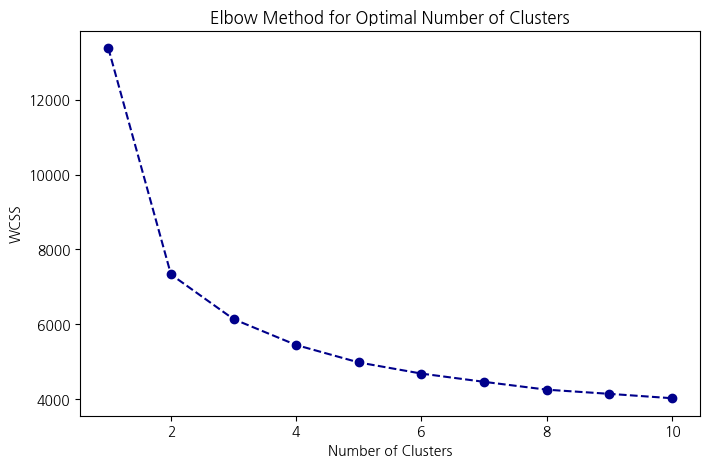

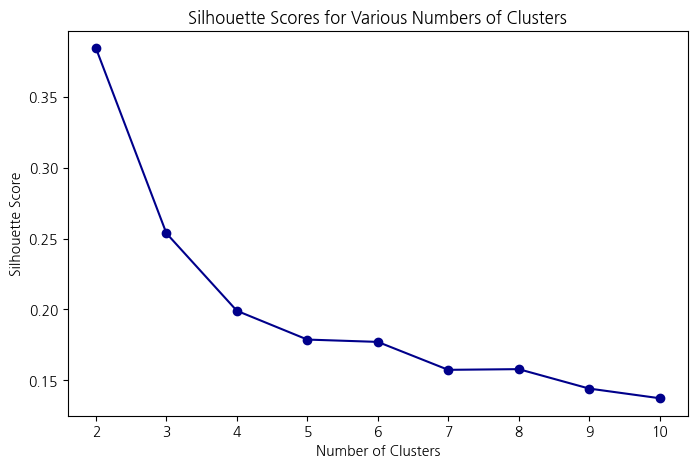

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
import matplotlib.pyplot as plt



# Elbow method (엘보우 방법)
wcss = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_data)

    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--',color='darkblue')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()




# 실루엣 분석을 사용해 최적의 K값 탐색
silhouette_scores = []
for k in range(2,11):
  kmeans = KMeans(n_clusters=k, random_state=0)
  kmeans.fit(scaled_data)
  score = silhouette_score(scaled_data, kmeans.labels_)
  silhouette_scores.append(score)

# 실루엣 분석 그래프 그리기
plt.figure(figsize=(8, 5))
plt.plot(range(2,11), silhouette_scores, marker='o',color='darkblue')
plt.title('Silhouette Scores for Various Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


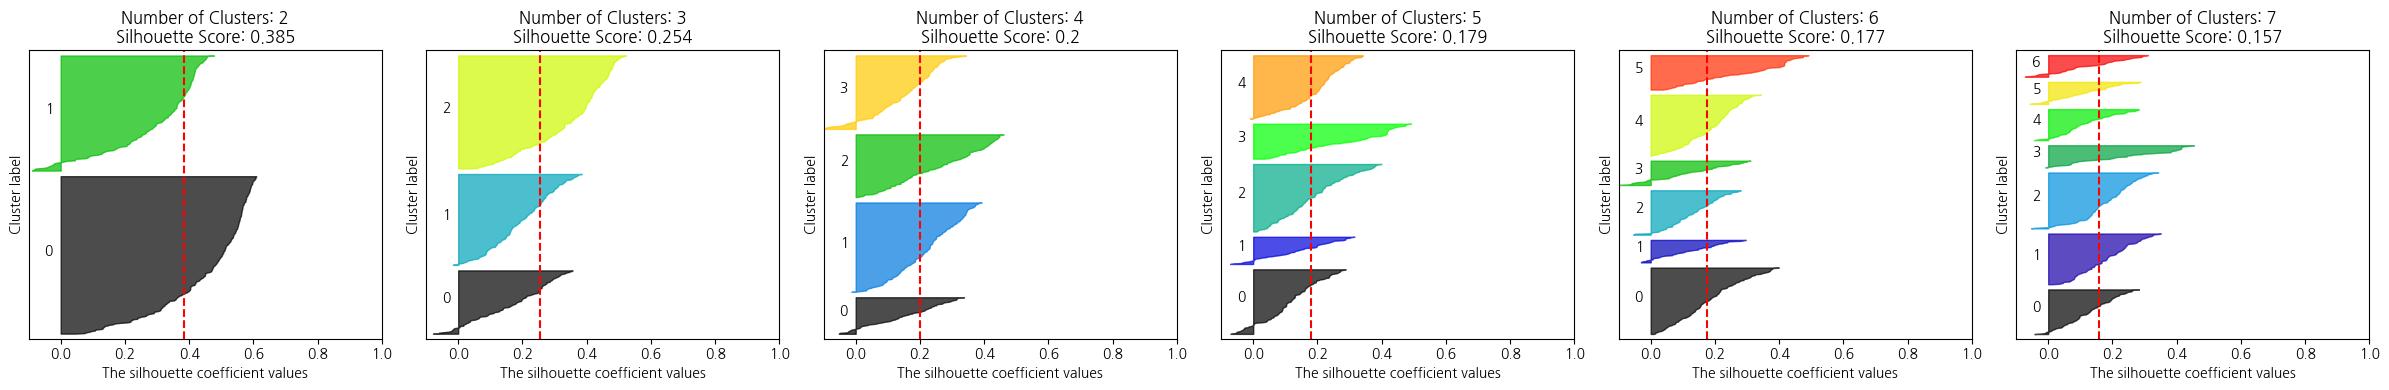

In [17]:
import matplotlib.cm as cm
import numpy as np
# 클러스터 갯수를 리스트로 받아 실루엣 시각화 함수
def visualize_silhouette_kmeans(cluster_lists, X_features):
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    for ind, n_cluster in enumerate(cluster_lists):
        # KMeans 모델 생성 및 학습
        kmeans = KMeans(n_clusters=n_cluster, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(X_features)

        # 실루엣 점수 계산
        sil_avg = silhouette_score(X_features, cluster_labels, metric='euclidean')  # 유클리드 거리 사용
        sil_values = silhouette_samples(X_features, cluster_labels, metric='euclidean')  # 유클리드 거리 사용

        y_lower = 10
        axs[ind].set_title(f'Number of Clusters: {n_cluster}\nSilhouette Score: {round(sil_avg, 3)}')
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # y축 레이블 제거
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels == i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values,
                                   facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

    plt.tight_layout()
    plt.show()

# 실루엣 시각화 함수 호출
visualize_silhouette_kmeans(range(2, 8), scaled_data)

In [18]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=7)

kmeans.fit(scaled_data)
cluster_labels = kmeans.fit_predict(scaled_data)
df_hitter['cluster_label'] = cluster_labels

# # # 개별 클러스터의 중심 위치 좌표
centers = kmeans.cluster_centers_



In [19]:
# # 각 cluster의 중앙값

# centroids = pd.DataFrame(kmeans.cluster_centers_, columns=scaled_data.columns)
# centroids['cluster'] = centroids.index

In [20]:
centroids

NameError: name 'centroids' is not defined

In [21]:
# cluster 중심과의 거리 제곱합 .inertia_
kmeans.inertia_

7330.613196113156

## 4.3 cluster 별 특징 확인

<Axes: xlabel='G', ylabel='WAR'>

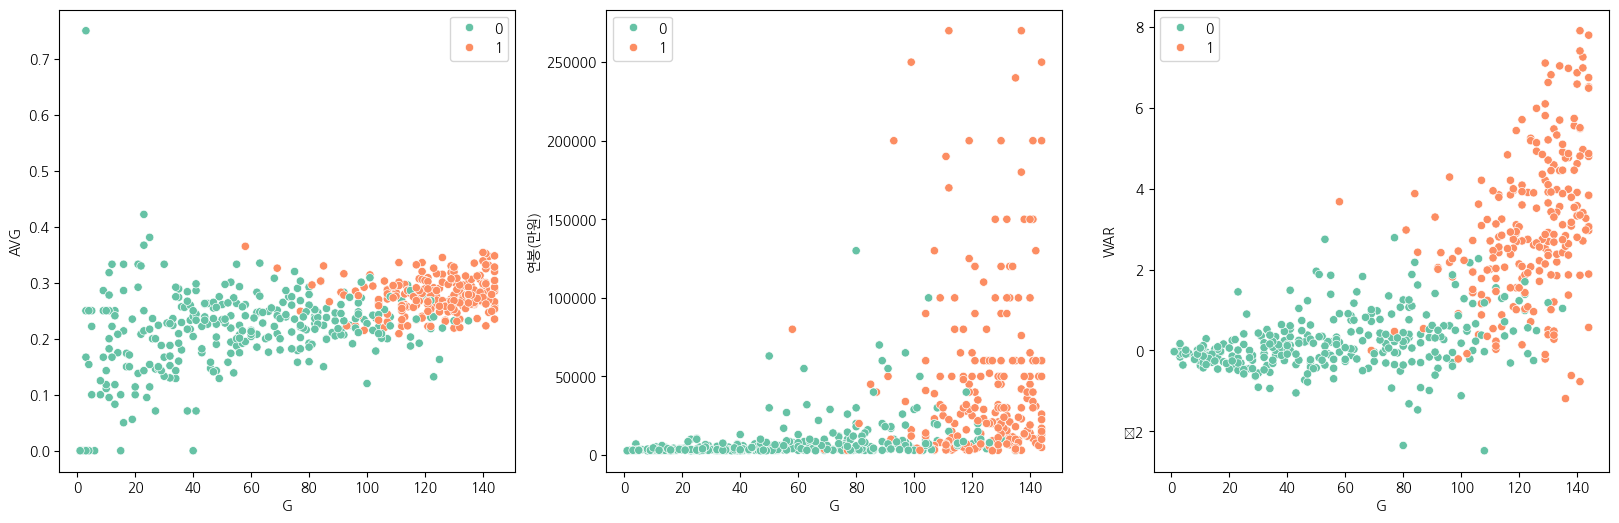

In [22]:
plt.figure(figsize=(20, 6))

plt.subplot(131)
# sns.scatterplot(x=df_hitter['TB'], y=df_hitter['AVG'], data=df_hitter, hue=kmeans.labels_, palette='coolwarm')
sns.scatterplot(x=df_hitter['G'], y=df_hitter['AVG'], data=df_hitter, hue=kmeans.labels_, palette='Set2')

# plt.ylim([0.2, 0.4])

plt.subplot(132)
sns.scatterplot(x=df_hitter['G'], y=df_hitter['연봉(만원)'], data=df_hitter, hue=kmeans.labels_, palette='Set2')


plt.subplot(133)
sns.scatterplot(x=df_hitter['G'], y=df_hitter['WAR'], data=df_hitter, hue=kmeans.labels_, palette='Set2')

cluster 0은 출전하는 선수보다 후보 선수나, 백업요원으로 팀에서 요긴하게 쓰는 선수들과 타격능력은 좋지 않지만 수비능력이 좋아

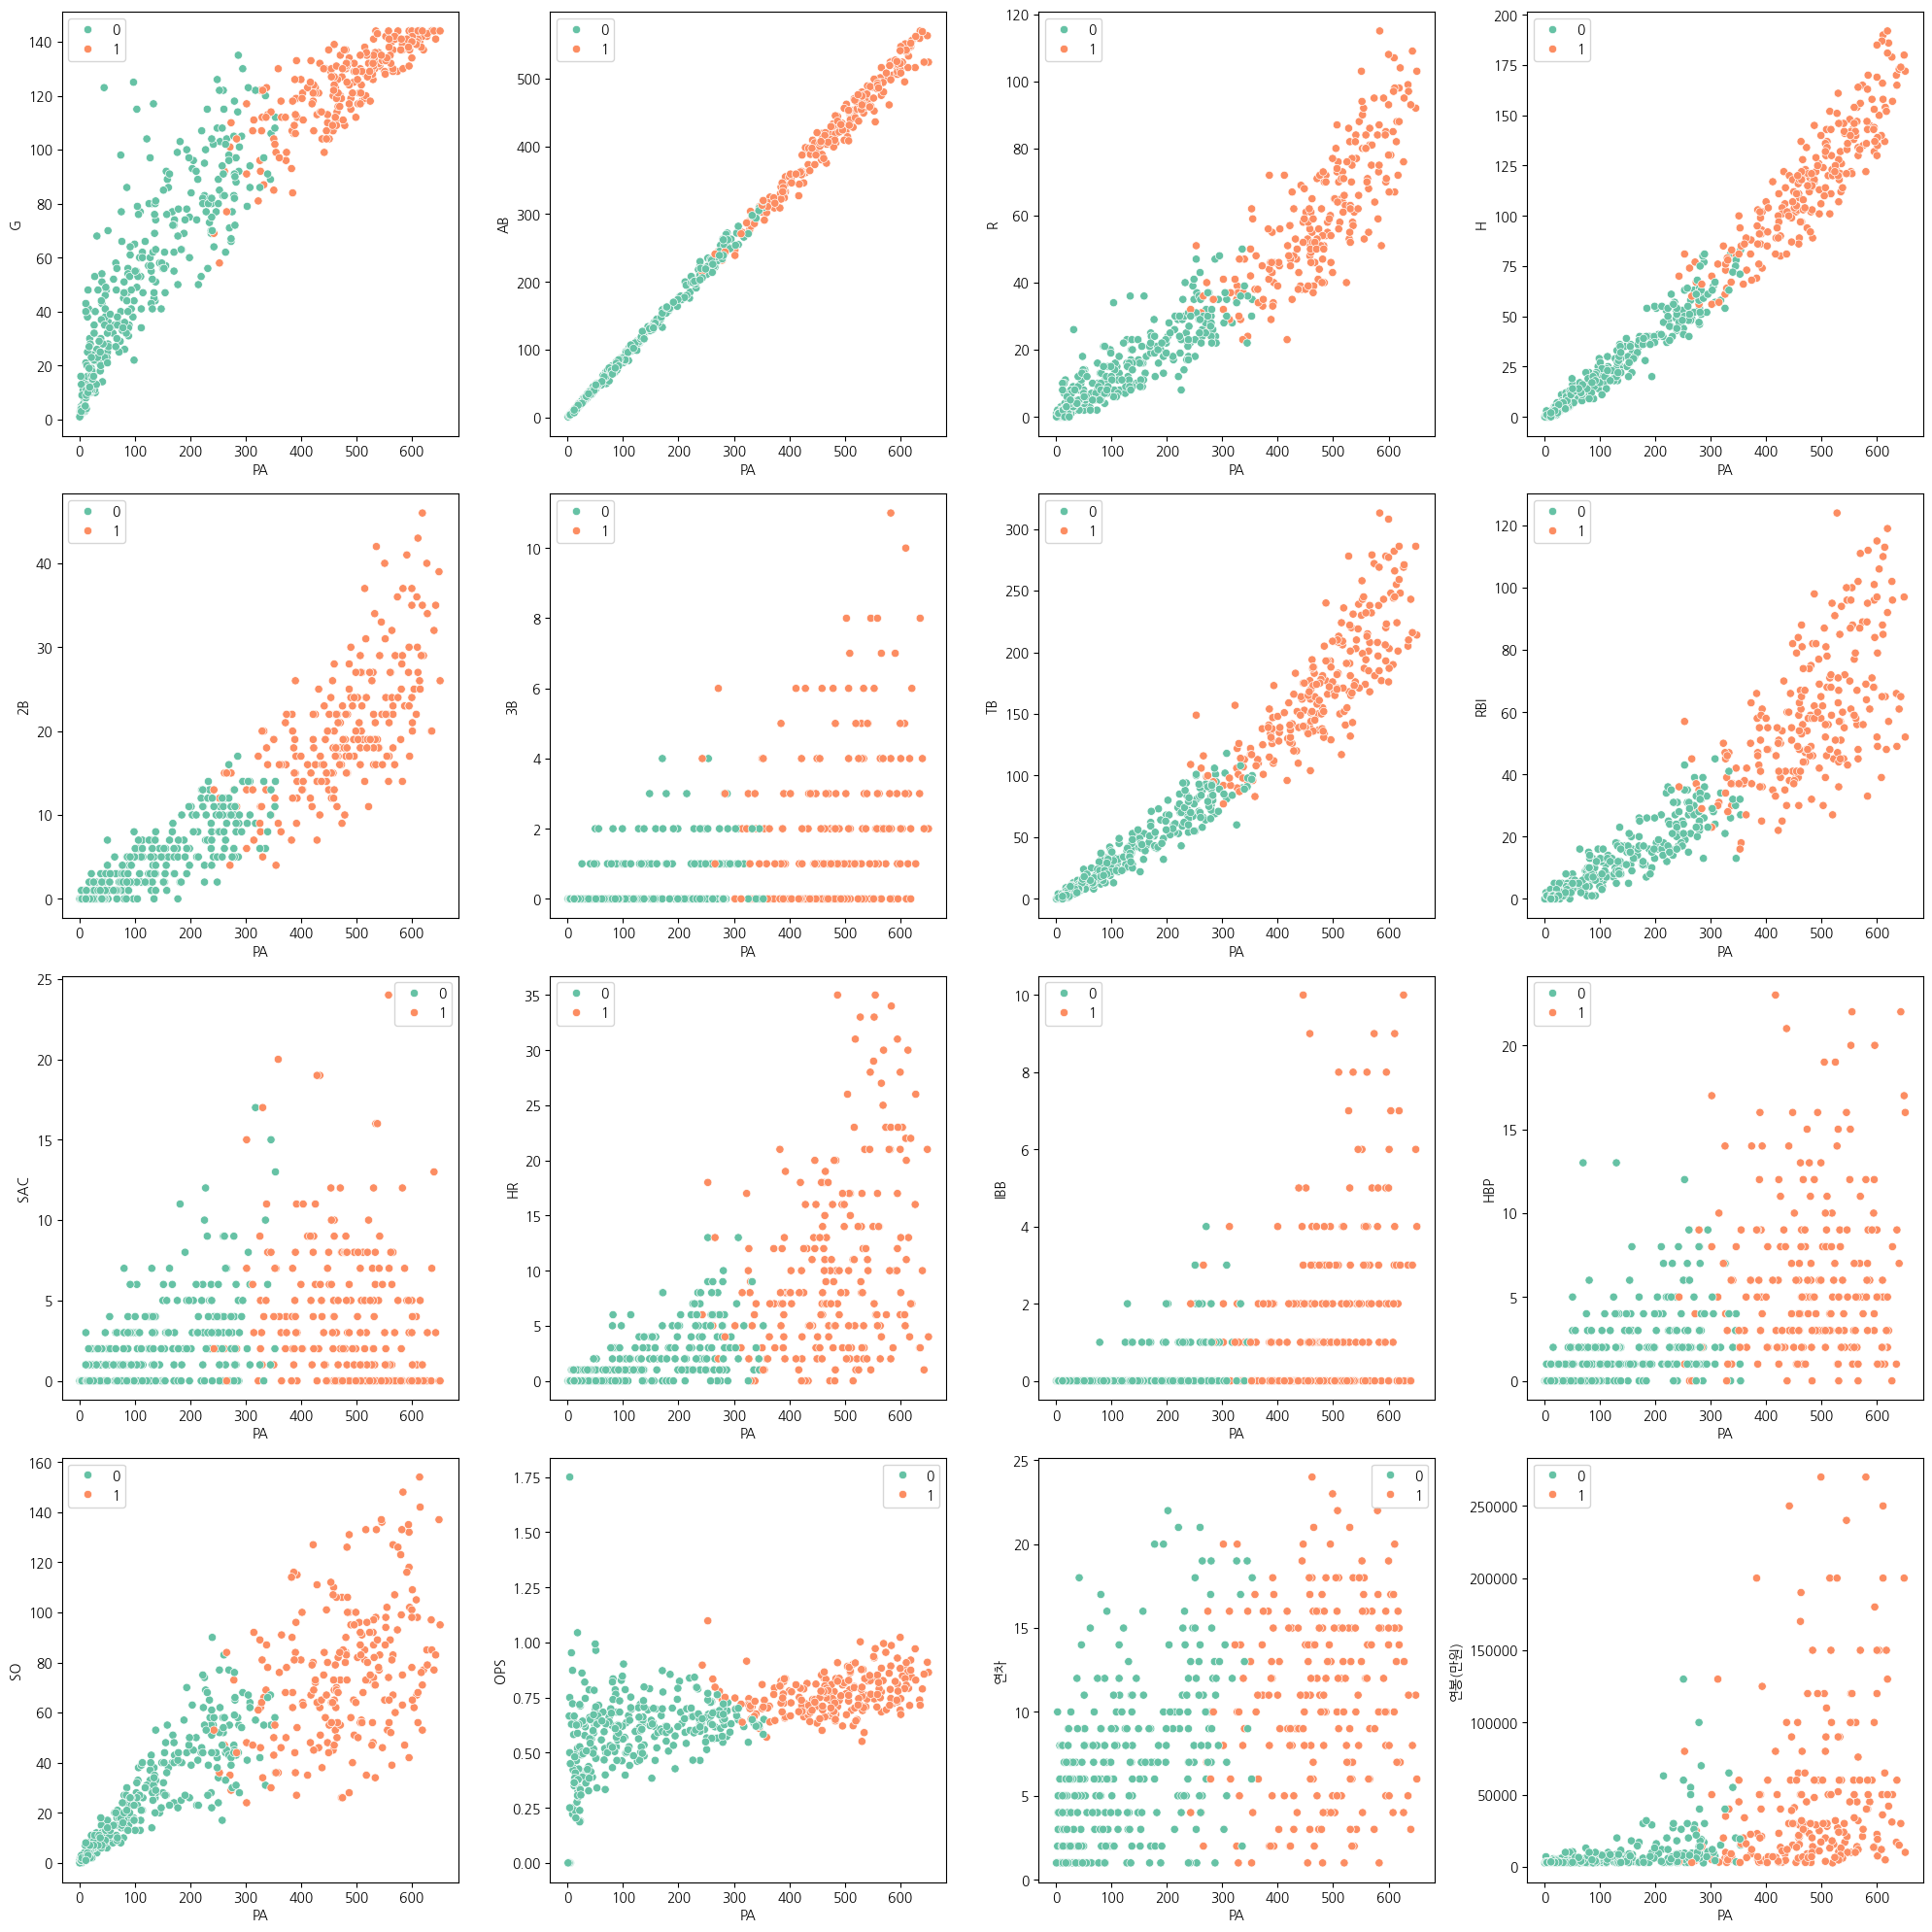

In [23]:
col_n = 4
row_n = 4
fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20, row_n*5))
# '3B','HR','SF','SO','BB','연차'
df_eda = df_hitter[['G','AB','R','H','2B','3B','TB','RBI','SAC','HR','IBB','HBP','SO','OPS','연차','연봉(만원)','PA']]

for i, col in enumerate(df_eda.columns[:-1]):
  sns.scatterplot(x=df_eda['PA'], y=df_eda[col], data=df_eda, hue=kmeans.labels_, palette='Set2', ax=ax[int(i/col_n), int(i%col_n)])

plt.tight_layout()

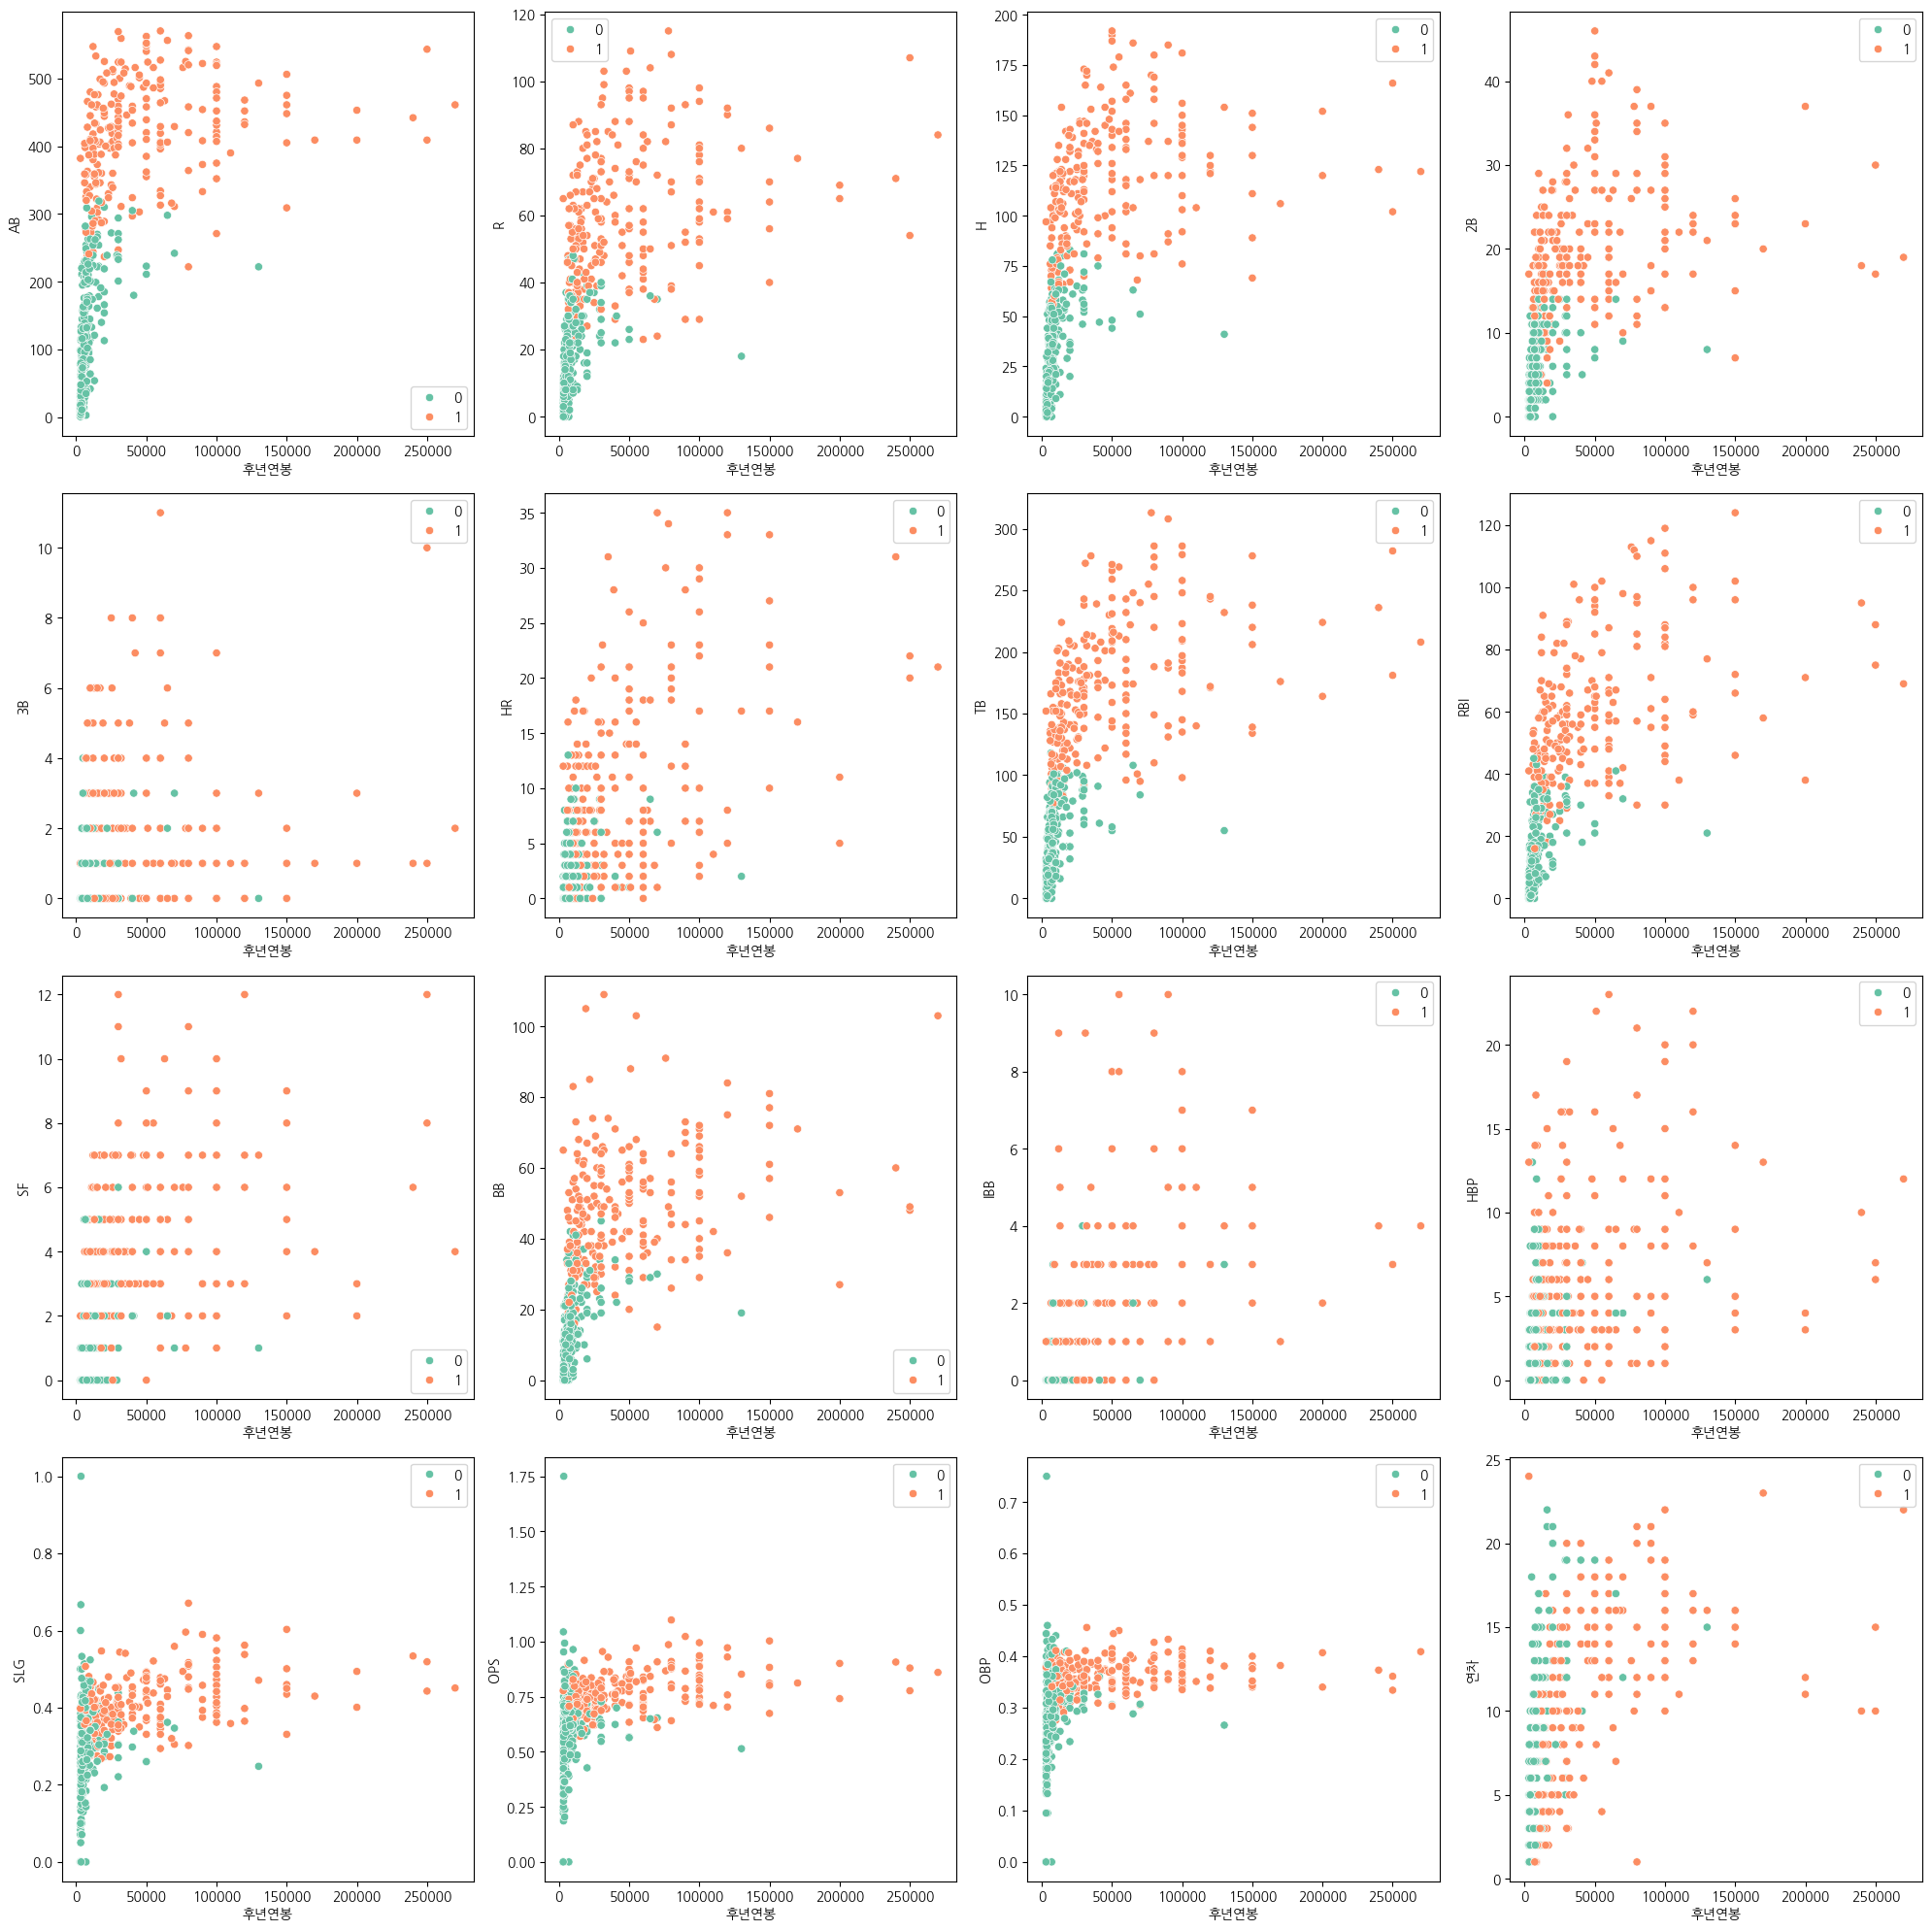

In [24]:
col_n = 4
row_n = 4
fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20, row_n*5))

# '3B','HR','SF','SO','BB','연차'
df_eda = df_hitter[['AB','R','H','2B','3B','HR','TB','RBI','SF','BB','IBB','HBP','SLG','OPS','OBP','연차','후년연봉']]

for i, col in enumerate(df_eda.columns[:-1]):
  sns.scatterplot(x=df_hitter['후년연봉'], y=df_hitter[col], data=df_hitter, hue=kmeans.labels_, palette='Set2', ax=ax[int(i/col_n), int(i%col_n)])

plt.tight_layout()

In [25]:
# col_n = 4
# row_n = 4
# fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20, row_n*5))

# df_hitter['경기 당 평균 홈런'] = df_hitter['HR'] /df_hitter['G']
# df_hitter['경기 당 평균 사구'] = df_hitter['HBP'] /df_hitter['G']
# df_hitter['경기 당 평균 고의사구'] = df_hitter['IBB'] /df_hitter['G']



# df_eda = df_hitter[['G','PA','AB','R','H','2B','3B','TB','RBI','SAC','경기 당 평균 홈런','경기 당 평균 사구','경기 당 평균 고의사구','SO','GDP','OPS','후년연봉']]

# for i, col in enumerate(df_eda.columns[:-1]):
#   sns.scatterplot(x=df_hitter['후년연봉'], y=df_hitter[col], data=df_hitter, hue=kmeans.labels_, palette='crest', ax=ax[int(i/col_n), int(i%col_n)])

# plt.tight_layout()


# 4. 회귀분석

## Data 전체를 scaling하고 나서 train과 test로 분리

In [31]:
from sklearn.preprocessing import StandardScaler

df_scaler = df_hitter.drop(['연도','후년연봉'],axis=1)
df_scaler = df_scaler.iloc[:,3:]

df_eda = df_hitter[['AB','R','H','2B','3B','HR','TB','RBI','SF','BB','IBB','HBP','SLG','OPS','OBP','연차','연봉(만원)']]

scaler = StandardScaler()
df_eda.loc[:,:] = scaler.fit_transform(df_eda)

# data = df_scaler[['H','HR','WAR','연차','연봉(만원)','OPS+']]
target = df_hitter['후년연봉']


In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_eda, target,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=34)

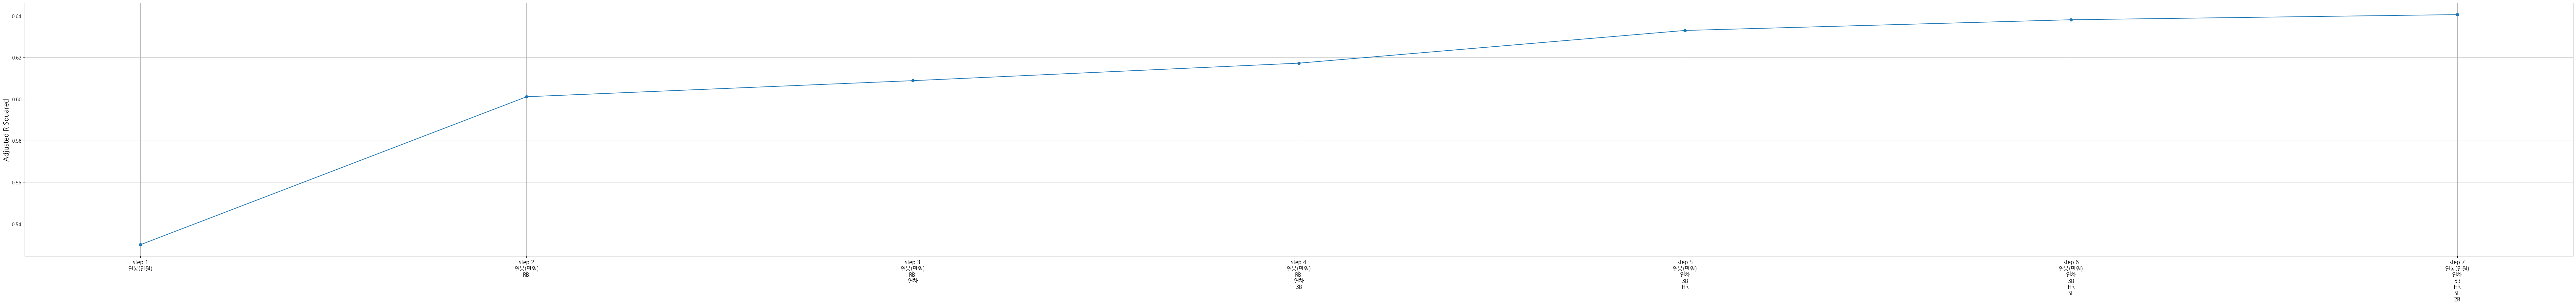

In [34]:
def stepwise_feature_selection(X_train, y_train, variables=X_train.columns.tolist()):
  import statsmodels.api as sm
  import matplotlib.pyplot as  plt
  import warnings
  warnings.filterwarnings('ignore')

  y = y_train             # target, 반응 변수

  selected_variables = [] # 선택된 변수들
  sl_enter = 0.05
  sl_remove = 0.05

  sv_per_step = []          # 각 단계별로 선택된 변수들
  adjusted_r_squared = []  # 각 단계별로 수정된 결정계수
  steps = []                # 스텝
  step = 0

  while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) # 변수의 p-value

    # 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 선형 모형을 적합한다.
    for col in remainder:
      X = X_train[selected_variables+[col]]
      X = sm.add_constant(X)
      model = sm.OLS(y,X).fit(disp=0)
      pval[col] = model.pvalues[col]

    min_pval = pval.min()
    if min_pval < sl_enter:  # 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        # 선택된 변수들에 대해서 어떤 변수를 제거할지 고른다
        while len(selected_variables) > 0 :
              selected_X = X_train[selected_variables]
              selected_X = sm.add_constant(selected_X)
              selected_pval = sm.OLS(y, selected_X).fit(disp=0).pvalues[1:] # 절편항의 p-value는 뺀다
              max_pval = selected_pval.max()

              if max_pval >= sl_remove: # 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                selected_variables.remove(remove_variable)
              else:
                break

        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y, sm.add_constant(X_train[selected_variables])).fit(disp=0).rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
         break

  fig = plt.figure(figsize=(100,10))
  fig.set_facecolor('white')

  font_size = 15
  plt.xticks(steps, [f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
  plt.plot(steps,adjusted_r_squared, marker='o')

  plt.ylabel('Adjusted R Squared',fontsize=font_size)
  plt.grid(True)
  plt.show()

  return selected_variables

selected_variables = stepwise_feature_selection(X_train, y_train)

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def feature_engineering_XbyBIF(X):
  vif = pd.DataFrame()
  vif['VIF_Factor'] = [variance_inflation_factor(X.values, i)
                        for i in range(X.shape[1])]
  vif['Feature'] = X.columns
  return vif

# data = X_train[['3B','HR','SF','SO','BB','연차','연봉(만원)']]
data = X_train[['3B','HR','SF','2B','BB','연차','연봉(만원)']]


vif = feature_engineering_XbyBIF(data)

print(vif)

   VIF_Factor Feature
0    1.326101      3B
1    2.410621      HR
2    2.346783      SF
3    4.195414      2B
4    3.598499      BB
5    1.714849      연차
6    1.920453  연봉(만원)


In [38]:
import statsmodels.api as sm
cons = sm.add_constant(data)
model = sm.OLS(y_train, cons)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                   후년연봉   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     110.6
Date:                Sun, 01 Sep 2024   Prob (F-statistic):           3.27e-91
Time:                        11:34:27   Log-Likelihood:                -4911.5
No. Observations:                 428   AIC:                             9839.
Df Residuals:                     420   BIC:                             9871.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.586e+04   1140.474     22.677      0.0

In [ ]:
import statsmodels.api as sm
data = sm.add_constant(X_train[['H','HR','WAR','연차','연봉(만원)','OPS']])
model = sm.OLS(y_train, data)
results = model.fit()
print(results.summary())


In [ ]:
data = sm.add_constant(X_train[['3B','HR','SF','SO','BB','연차','연봉(만원)']])
model = sm.OLS(y_train, data)
results = model.fit()
print(results.summary())


In [ ]:
import pandas as pd
import statsmodels.api as sm

data = X_train[['3B','HR','SF','SO','BB','연차','연봉(만원)']]
target = y_train
model = sm.OLS(target, data)

results = model.fit()
print(results.summary())

## train과 test로 먼저 분리한 후 scaling진행

In [ ]:
df_hitter

In [ ]:
df_hitter['후년연봉']

In [ ]:
X

In [ ]:
df_hitter

In [ ]:
# 데이터 분리
from sklearn.model_selection import train_test_split

X = df_hitter.drop(['팀명','선수명','순위','연도','후년연봉'],axis=1)
y = df_hitter['후년연봉']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=34,
                                                    # shuffle=True
                                      )

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled_train = X_train.copy()
X_scaled_train.loc[:,:] = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

## 4.3 RandomForestRegressor

In [39]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
model = rf.fit(data,y_train)

In [41]:
pred = model.predict(X_test[['3B','HR','SF','2B','BB','연차','연봉(만원)']])

In [42]:
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np

mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)
print(f'MSE : {mse} \nRMSE: {rmse} \nR Square : {r2}')

MSE : 302956374.77780324 
RMSE: 17405.64203865526 
R Square : 0.6683105035276511


In [47]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
def evaluation(y_test , pred):

    mae = mean_absolute_error(y_test,pred) ## mae
    mse = mean_squared_error(y_test,pred) # mse
    rmse = np.sqrt(mean_squared_error(y_test,pred)) # rmse

    print('mae: {}, mse: {}, rmse:{}'.format(mae, mse, rmse))

In [46]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[2800, 3000, 3300],
    'max_depth' : [6, 8, 10, 12],
    'min_samples_leaf' : [8, 12, 18],
    'min_samples_split' : [8, 16, 20]
}

rf_clf = RandomForestRegressor(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2, n_jobs=2, verbose=2 )
grid_cv.fit(data , y_train) # grid.cv.fit(train_x, train_y)

estimator =grid_cv.best_estimator_
pred = estimator.predict(X_test[['3B','HR','SF','2B','BB','연차','연봉(만원)']]) # estimator.predict(test)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))
evaluation(y_test , pred)

Fitting 2 folds for each of 108 candidates, totalling 216 fits
최적 하이퍼 파라미터:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 3000}
최고 예측 정확도: 0.5941


NameError: name 'mean_absolute_error' is not defined

In [48]:
evaluation(y_test , pred)


mae: 6178.411000455014, mse: 233528748.01559988, rmse:15281.647424790295


In [43]:
import pandas as pd
import statsmodels.api as sm

data = sm.add_constant(X_scaled_train[['3B','HR','SF','SO','BB','연차','연봉(만원)']])

model = sm.OLS(y_train, data)

results = model.fit()
print(results.summary())

NameError: name 'X_scaled_train' is not defined

In [ ]:
from sklearn.preprocessing import StandardScaler

df_scaler = df_hitter.drop(['연도','후년연봉'],axis=1)
df_scaler = df_scaler.iloc[:,3:]
scaler = StandardScaler()
df_scaler.loc[:,:] = scaler.fit_transform(df_scaler)

# data = df_scaler[['H','HR','WAR','연차','연봉(만원)','OPS+']]
target = df_hitter['후년연봉']

In [49]:
target.describe()

,후년연봉
count,535.000000
mean,25481.738318
std,37783.821164
min,3000.000000
25%,4500.000000
50%,9000.000000
75%,30000.000000
max,270000.000000


In [ ]:
if df_hitter['후년연봉'] < 4500 :
  df_hitter['연봉구간'] == 0
elif df_hitter['후년연봉'] < 9000:
  df_hitter['연봉구간'] == 1
elif df_hitter['후년연봉'] < 30000:
  df_hitter['연봉구간'] == 2
else df_hitter['연봉구간'] == 3